# Helpful Websites and Videos to Scrape Reddit
### Used to create credentials needed
#### 1.) https://www.reddit.com/prefs/apps
### Script was used
### Created my 'RedirectURL' via. github repo and creating a page
### Scraping the wallstreetbets Reddit using Python PRAW Library
#### 1.) https://www.youtube.com/watch?v=eYXSZo-Bc2U 
#### 2.) https://github.com/reddit-archive/reddit/wiki/API
### OAuth2 App Types 
#### 1.) https://github.com/reddit-archive/reddit/wiki/oauth2-app-types
#### 2.) https://github.com/reddit-archive/reddit/wiki/OAuth2

### Coins and Tokens
#### 1.) https://github.com/reddit-archive/reddit/wiki/OAuth2

#### 2.) https://praw.readthedocs.io/en/v3.6.2/pages/oauth.html

### How to Hide APIKeys 
#### 1.) https://www.youtube.com/watch?v=CJjSOzb0IYs 

# How to Use PRAW
### Comment Extraction and Parsing 
#### 1.) https://praw.readthedocs.io/en/latest/tutorials/comments.html
#### 2.) https://praw.readthedocs.io/en/latest/getting_started/configuration/options.html#basic-options
#### 3.) https://praw.readthedocs.io/en/v3.6.2/pages/oauth.html

## Import

In [74]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import praw

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

## Function that Grab Data with PRAW

In [45]:
# Instantiate Reddit using PRAW.
# API Pull Set-Up of Comments with Praw
# reddit = praw.Reddit(
#    client_id=" ",
#    client_secret=" ",
#    password=" ",
#    user_agent="Comment Extraction (by u/USERNAME)",
#    username=" ",
#                    )

## Analyzing Subreddits r/WFH and r/digitalnomad

In [46]:
CombinedSubsList = ['WFH', 'digitalnomad']

In [33]:
max_docs = 5000

CombinedSubName =  CombinedSubsList[0]
subreddit = reddit.subreddit(CombinedSubName).hot(limit=max_docs)
subreddit_text = []

for submission in subreddit: 
    if len(subreddit_text) > max_docs:
        break    
    subreddit_text.append(submission.title) 
    subreddit_text.append(submission.selftext)
    submission.comments.replace_more(limit = max_docs)
    for comment in submission.comments.list(): 
        if len(subreddit_text) > max_docs:
            break
        subreddit_text.append(comment.body) 
        print(len(subreddit_text))  

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
26
27
28
29
30
31
32
33
34
35
36
41
42
43
44
51
52
53
56
57
58
59
60
61
62
63
64
65
66
67
70
73
74
75
76
77
78
79
80
81
84
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
128
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
198
199
200
201
202
203
204
209
210
211
212
213
214
215
216
217
218
221
222
223
224
225
226
227
228
229
230
231
234
235
236
237
238
239
240
241
242
245
246
247
248
249
252
253
254
255
256
257
258
259
260
261
262
263
266
267
268
269
270
271
272
273
274
275
276
277
278
279
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
299
300
301
304
305
306
307
308
315
316
317
318
321
324
325
326
327
328
329
330
331
334
33

2211
2212
2213
2214
2217
2220
2221
2222
2223
2224
2225
2226
2227
2228
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2262
2263
2264
2265
2266
2267
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2282
2283
2284
2285
2286
2287
2288
2289
2290
2293
2294
2295
2300
2301
2302
2303
2306
2307
2310
2311
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2364
2365
2368
2369
2370
2371
2372
2373
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2404
2405
2406
2407
2408
2409
2410
2413
2414
2415
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2446
2447
2448
2451
2452
2453
2454
2455
2456
2457
2458


4239
4240
4241
4242
4245
4246
4247
4250
4251
4252
4253
4254
4255
4256
4257
4258
4259
4260
4261
4262
4263
4264
4265
4266
4267
4268
4269
4270
4271
4272
4273
4274
4275
4278
4279
4282
4283
4284
4285
4286
4287
4288
4289
4290
4291
4292
4293
4294
4295
4298
4299
4300
4303
4304
4305
4306
4307
4308
4309
4312
4313
4314
4315
4316
4317
4320
4321
4322
4323
4324
4325
4326
4327
4328
4329
4330
4333
4334
4335
4336
4337
4338
4339
4340
4343
4344
4345
4346
4347
4348
4349
4350
4351
4352
4353
4354
4355
4356
4357
4358
4359
4360
4361
4362
4363
4366
4367
4368
4369
4370
4371
4372
4373
4374
4375
4376
4377
4378
4379
4380
4381
4382
4387
4388
4389
4390
4391
4394
4395
4396
4397
4398
4399
4400
4401
4402
4403
4404
4405
4406
4407
4408
4409
4410
4411
4412
4413
4414
4415
4416
4419
4422
4423
4424
4425
4426
4427
4428
4429
4430
4431
4432
4433
4434
4437
4438
4439
4440
4441
4442
4443
4444
4445
4446
4449
4450
4451
4452
4453
4454
4455
4458
4459
4460
4461
4462
4463
4464
4465
4466
4467
4468
4469
4470
4471
4472
4473
4474
4475
4476


In [34]:
df = pd.DataFrame({"text":[], "subreddit": []})


In [35]:
sub_df = pd.DataFrame({"text":subreddit_text, 
                             "subreddit": [subreddit_name for t in subreddit_text]})
df = pd.concat([df, sub_df], ignore_index=True)

In [36]:
max_docs = 5000 

CombinedSubName =  CombinedSubsList[1]
subreddit = reddit.subreddit(CombinedSubName).hot(limit=max_docs) 
subreddit_text = [] 

for submission in subreddit: 
    if len(subreddit_text) > max_docs:
        break    
    subreddit_text.append(submission.title) 
    subreddit_text.append(submission.selftext) 
    submission.comments.replace_more(limit = max_docs)
    for comment in submission.comments.list():
        if len(subreddit_text) > max_docs:
            break
        subreddit_text.append(comment.body) 

In [37]:
sub_df = pd.DataFrame({"text":subreddit_text, 
                             "subreddit": [CombinedSubName for t in subreddit_text]}) 
df = pd.concat([df, sub_df], ignore_index=True)

In [38]:
len(df["text"].unique())

9568

## Analyze Data and Create Features for Both Subreddits

In [69]:
df.head()

,text,subreddit,tokenized,stemmed,lower,newtext
0,currently a temp WFH wanting to find a perm po...,WFH,"[currently, a, temp, WFH, wanting, to, find, a...","[current, a, temp, wfh, want, to, find, a, per...","[current, a, temp, wfh, want, to, find, a, per...",current a temp wfh want to find a perm posit
1,As stated in the title I'm currently a temp in...,WFH,"[As, stated, in, the, title, I, 'm, currently,...","[as, state, in, the, titl, i, 'm, current, a, ...","[as, state, in, the, titl, i, 'm, current, a, ...",as state in the titl i 'm current a temp in it...
2,I just found this [it’s travel od](https://www...,WFH,"[I, just, found, this, [, it, ’, s, travel, od...","[i, just, found, thi, [, it, ’, s, travel, od,...","[i, just, found, thi, [, it, ’, s, travel, od,...",i just found thi [ it ’ s travel od ] ( http :...
3,"I'm located in Texas, USA. If that matters.",WFH,"[I, 'm, located, in, Texas, ,, USA, ., If, tha...","[i, 'm, locat, in, texa, ,, usa, ., if, that, ...","[i, 'm, locat, in, texa, ,, usa, ., if, that, ...","i 'm locat in texa , usa . if that matter ."
4,Check out my free daily newsletter! I send out...,WFH,"[Check, out, my, free, daily, newsletter, !, I...","[check, out, my, free, daili, newslett, !, i, ...","[check, out, my, free, daili, newslett, !, i, ...",check out my free daili newslett ! i send out ...


In [49]:
from nltk.stem import PorterStemmer
import nltk
ps = PorterStemmer()

df['tokenized'] = [nltk.word_tokenize(doc) for doc in df['text']]

df['stemmed'] = [[ps.stem(word) for word in row] for row in df['tokenized']]

df['lower'] = [[word.lower() for word in row] for row in df['stemmed']]

df['newtext'] = [" ".join(row) for row in df['lower']]

df.head()

,text,subreddit,tokenized,stemmed,lower,newtext
0,currently a temp WFH wanting to find a perm po...,WFH,"[currently, a, temp, WFH, wanting, to, find, a...","[current, a, temp, wfh, want, to, find, a, per...","[current, a, temp, wfh, want, to, find, a, per...",current a temp wfh want to find a perm posit
1,As stated in the title I'm currently a temp in...,WFH,"[As, stated, in, the, title, I, 'm, currently,...","[as, state, in, the, titl, i, 'm, current, a, ...","[as, state, in, the, titl, i, 'm, current, a, ...",as state in the titl i 'm current a temp in it...
2,I just found this [it’s travel od](https://www...,WFH,"[I, just, found, this, [, it, ’, s, travel, od...","[i, just, found, thi, [, it, ’, s, travel, od,...","[i, just, found, thi, [, it, ’, s, travel, od,...",i just found thi [ it ’ s travel od ] ( http :...
3,"I'm located in Texas, USA. If that matters.",WFH,"[I, 'm, located, in, Texas, ,, USA, ., If, tha...","[i, 'm, locat, in, texa, ,, usa, ., if, that, ...","[i, 'm, locat, in, texa, ,, usa, ., if, that, ...","i 'm locat in texa , usa . if that matter ."
4,Check out my free daily newsletter! I send out...,WFH,"[Check, out, my, free, daily, newsletter, !, I...","[check, out, my, free, daili, newslett, !, i, ...","[check, out, my, free, daili, newslett, !, i, ...",check out my free daili newslett ! i send out ...


In [50]:
df[['text', 'subreddit', 'newtext']].to_csv("WFHdigitalnomad")

## Train/test split

In [51]:
X = df["text"]
y = df["subreddit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle = True)

In [52]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words = "english", lowercase=True)

X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

print("Number of features:",X_train_counts.shape[1])

Number of features: 114126


## Fit to Logistic Regression Model

In [53]:
Log = LogisticRegression(random_state = 42)
Log.fit(X_train_counts, y_train)

print("Train data CV score:", cross_val_score(Log, X_train_counts, y_train, cv= 5))
print("Test data score:", Log.score(X_test_counts, y_test))

Train data CV score: [0.80835198 0.80611484 0.80522388 0.80149254 0.79925373]
Test data score: 0.8079369887912754


## Logistic Regression Coefficients for r/WFH

In [54]:
Coef = pd.DataFrame(Log.coef_.tolist()[0], index=vectorizer.get_feature_names()).sort_values(0)
Coef.head(20).sort_values(0, ascending = True)

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0
wfh,-7.713109
office,-5.478953
job,-4.187229
home,-3.059532
work,-2.980772
desk,-2.842666
company,-2.389099
jobs,-2.283791
working home,-2.112716
day,-2.041842


## Logistic Regression Coefficients for r/digitalnomad

In [55]:
Coef.tail(20).sort_values(0, ascending = False)

,0
country,3.573275
airbnb,3.425779
month,2.863306
nomad,2.721290
places,2.641610
place,2.640761
city,2.639234
visa,2.624555
dn,2.479216
countries,2.418015


## Finding the Best Classifier

### Naive Bayes Classifier Model

In [60]:
Bayes = MultinomialNB(alpha = .7)
Bayes.fit(X_train_counts, y_train)

print("Train data CV score:", cross_val_score(Bayes, X_train_counts, y_train, cv= 5))
print("Test data score:", Bayes.score(X_test_counts, y_test))

Train data CV score: [0.82699478 0.81208054 0.8380597  0.81791045 0.82910448]
Test data score: 0.8324750075734626


### Random Forest Classifier Model

In [61]:
Random = RandomForestClassifier()
Random.fit(X_train_counts, y_train)

print("Train data CV score:", cross_val_score(Random, X_train_counts, y_train, cv= 5))
print("Test data score:", Random.score(X_test_counts, y_test))

Train data CV score: [0.80164057 0.78150634 0.78507463 0.76865672 0.77686567]
Test data score: 0.7855195395334748


### Extra Trees Classifier Model

In [63]:
Extra = ExtraTreesClassifier()
Extra.fit(X_train_counts, y_train)

print("Train data CV score:", cross_val_score(Extra, X_train_counts, y_train, cv= 5))
print("Test data score:", Extra.score(X_test_counts, y_test))

Train data CV score: [0.80089485 0.79492916 0.80373134 0.78731343 0.79626866]
Test data score: 0.8052105422599213


### KNN Classifier Model

In [64]:
Knn = KNeighborsClassifier(n_neighbors=8)
Knn.fit(X_train_counts, y_train)

print("Train data CV score:", cross_val_score(Knn, X_train_counts, y_train, cv= 5))
print("Test data score:", Knn.score(X_test_counts, y_test))

Train data CV score: [0.48769575 0.50186428 0.49776119 0.51119403 0.49402985]
Test data score: 0.5289306270827022


### Test String "data science" to See which Subreddit it would be Categorized Under 
    Logistic Regression Classifier

In [67]:
test_post = ["data science"]
tes_counts = vectorizer.transform(test_post)
print(log_reg.predict(test_counts))

['WFH']


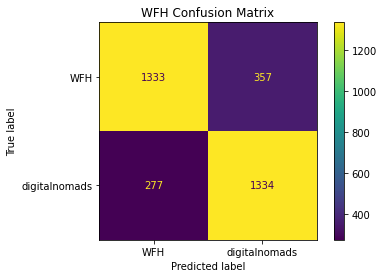

In [76]:
cm = confusion_matrix(y_test,log_reg.predict(X_test_counts))
labels = ['WFH', "digitalnomads"]
tn, fp, fn, tp = cm.ravel()
ConfusionMatrixDisplay(cm, display_labels=labels).plot()
plt.title('WFH Confusion Matrix');


## Summary
    Using Natural Language Processing methods,I was able to analyze both subreddit's r/WFH and r/digitalnomads 
    to train a Natural Language Processing model to identify what subreddit a test string is more likely to 
    oringate from  (subreddit group). With further effort,I could observe more specific subreddits or users and 
    look at sentiment analysis and add a view of how individual users change over time their subreddit
    digital fingerprint.
    A good next step could be to use PRAW to gather posts from more groups such as  r/WFH, r/workfromhome, and 
    r/digitalnomands and analyze the intensity of the interaction connections between these three subreddits and 
    visualize the promising interconnections as the connections extend to outer groups
